## Table names:
* private_investment
* net_generation
* installed_capacity

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import getpass
plt.style.use('ggplot')
colors = ["#0dba86", "#0d98ba","#0d42ba"]
colors2 = ['coral','#0d98ba','#a95292','#fe8402','#0dba86','olive','#0d42ba','maroon','#279989','hotpink','#1a405a','#f25e60','#eac05f','#95b211','#071d49','#ffbfb7','#244c96']

In [3]:
upass = getpass.getpass()
conn = psycopg2.connect(database="renewable_energy_generation", user="admin", password=upass, host="localhost", port="5432")
print("connected")
cur = conn.cursor()

········
connected


## 1st DF/Query

In [4]:
query_gen_cap = '''
    SELECT 
        g.country as country, 
        g.period as year,
        g.value as generated,
        c.value as capacity,
        c.bkwh_100 as capacity_100,
        c.bkwh_75 as capacity_75,
        (g.value/c.bkwh_100) as ratio_100,
        (g.value/c.bkwh_75) as ratio_75
    FROM installed_capacity as c
    JOIN net_generation as g
    ON c.country = g.country
    AND c.period = g.period
    WHERE g.value != 0
    AND c.bkwh_100 != 0
    ORDER BY country, year
    ;'''
cur.execute(query_gen_cap)

In [ ]:
conn.close()

In [5]:
df_gen_cap = pd.DataFrame(cur.fetchall(), columns=['country', 'year', 'generated_kwh', 'capacity_kw','capacity_kwh_100', 'capacity_kwh_75', 'ratio_100', 'ratio_75'])


In [6]:
df_gen_cap.sort_values(['country','year'],inplace=True)
df_gen_cap.drop_duplicates(subset=['country', 'year'],inplace=True)

#add % change for capacity, generation, ratio
df_gen = df_gen_cap['generated_kwh']
df_cap = df_gen_cap['capacity_kw']
df_ratio = df_gen_cap['ratio_75']
df_gen_cap['generation_change_percent'] = df_gen.pct_change()
df_gen_cap['capacity_change_percent'] = df_cap.pct_change()
df_gen_cap['ratio_change_percent'] = df_ratio.pct_change()

In [7]:
#remove percent change from first row of each country
df_gen_cap.loc[df_gen_cap.groupby('country')['generation_change_percent'].head(1).index, 'generation_change_percent'] = np.NaN
df_gen_cap.loc[df_gen_cap.groupby('country')['capacity_change_percent'].head(1).index, 'capacity_change_percent'] = np.NaN
df_gen_cap.loc[df_gen_cap.groupby('country')['ratio_change_percent'].head(1).index, 'ratio_change_percent'] = np.NaN


In [8]:
df_gen_cap

,country,year,generated_kwh,capacity_kw,capacity_kwh_100,capacity_kwh_75,ratio_100,ratio_75,generation_change_percent,capacity_change_percent,ratio_change_percent
0,Afghanistan,1980,0.71100,0.26200,2.295120,1.721340,0.309788,0.413050,NaN,NaN,NaN
1,Afghanistan,1981,0.72100,0.25900,2.268840,1.701630,0.317784,0.423711,0.014065,-0.011450,0.025811
2,Afghanistan,1982,0.70700,0.25900,2.268840,1.701630,0.311613,0.415484,-0.019417,0.000000,-0.019417
3,Afghanistan,1983,0.74600,0.27200,2.382720,1.787040,0.313088,0.417450,0.055163,0.050193,0.004732
4,Afghanistan,1984,0.75700,0.27200,2.382720,1.787040,0.317704,0.423606,0.014745,0.000000,0.014745
5,Afghanistan,1985,0.77000,0.28100,2.461560,1.846170,0.312810,0.417080,0.017173,0.033088,-0.015405
6,Afghanistan,1986,0.71300,0.28100,2.461560,1.846170,0.289654,0.386205,-0.074026,0.000000,-0.074026
7,Afghanistan,1987,0.75600,0.29000,2.540400,1.905300,0.297591,0.396788,0.060309,0.032028,0.027402
8,Afghanistan,1988,0.74400,0.29000,2.540400,1.905300,0.292867,0.390490,-0.015873,0.000000,-0.015873
9,Afghanistan,1989,0.75000,0.29200,2.557920,1.918440,0.293207,0.390943,0.008065,0.006897,0.001160


## 2nd DF/Query

In [9]:
query_priv_inv = '''
    SELECT 
        region,
        country,
        income_group,
        project_name,
        technology,
        total_investment as cost_usd_millions,
        investment_year as year,
        capacity as capacity_mw
    FROM private_investment
    ORDER BY region, country, year
    ;'''
cur.execute(query_priv_inv)

In [10]:
df_private_inv = pd.DataFrame(cur.fetchall(), columns=['region', 'country', 'income_group',
                                                       'project_name','technology', 
                                                       'cost_usd_millions', 
                                                        'year', 'capacity_mw'])

In [11]:
test_df = df_private_inv.groupby('year',as_index = False).count()

In [12]:
df_private_inv["cost_usd_millions"] = pd.to_numeric(df_private_inv["cost_usd_millions"])
df_private_inv["year"] = pd.to_numeric(df_private_inv["year"])
df_private_inv.loc[df_private_inv['capacity_mw'] == 'Not Available','capacity_mw'] = np.nan
df_private_inv["capacity_mw"] = pd.to_numeric(df_private_inv["capacity_mw"])

In [13]:
df_private_inv["capacity_kw"] = df_private_inv["capacity_mw"]*1000

In [14]:
conn.close()

## INV Investment $ in top 16 countries

In [15]:
df_inv_country = df_private_inv.groupby('country',as_index=False)['cost_usd_millions'].sum()
df_inv_country.sort_values(by='cost_usd_millions',ascending=False,inplace=True)

In [16]:
# pull top 16 to work with in other places:
df_top16 = df_inv_country['country'][:16]
df_top16.replace('Lao PDR','Laos',inplace=True) #adjust to match other dataset
df_top16.replace('South Africa','SouthAfrica',inplace=True)
top16 = list(df_top16)

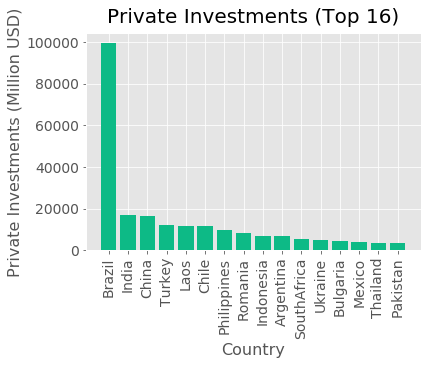

In [17]:
fig, ax = plt.subplots()
x = np.linspace(1980,2016,7)
xvals = df_inv_country['country'][:16]
yvals = df_inv_country['cost_usd_millions'][:16]
plt.xticks(rotation='vertical',fontsize=14)
ax.bar(xvals,yvals,color=colors[0])
ax.tick_params(axis="y", labelsize=14)
ax.set_xlabel("Country",fontsize=16)
ax.set_ylabel("Private Investments (Million USD)",fontsize=16)
ax.set_title("Private Investments (Top 16)",fontsize=20,pad=10);

## INV Investment by country classification and tech category

In [18]:
df_inv_tech_cat = df_private_inv.copy()
df_inv_tech_cat['tech_category'],df_inv_tech_cat['technology'] = df_inv_tech_cat['technology'].str.split(',',1).str


In [19]:
df_inv_tech_cat_agg = df_inv_tech_cat.groupby(['income_group','tech_category'],as_index=False)['cost_usd_millions'].sum()

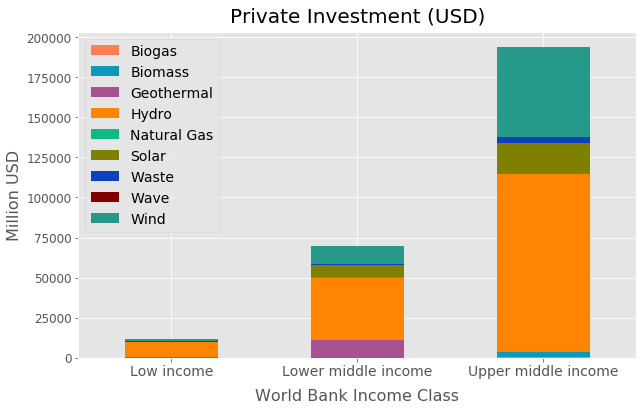

In [22]:
pivot_df = df_inv_tech_cat_agg.pivot(index='income_group', columns='tech_category', values='cost_usd_millions')
#pivot_df.plot.bar(stacked=True, figsize=(10,7))
ax = pivot_df.plot(kind='bar', title ="V comp", figsize=(10, 6), legend=True, fontsize=12,stacked=True,color=colors2)
ax.tick_params(axis="x", rotation = 0, labelsize=14)
ax.tick_params(axis="y", labelsize=12)
ax.set_title("Private Investment (USD)",fontsize = 20,pad=10)
ax.set_xlabel("World Bank Income Class",fontsize=16,labelpad=10)
ax.set_ylabel("Million USD",fontsize=16)
ax.legend(fontsize=14);

## INV avg capacity per USD investment by tech type (all)

In [23]:
df_inv_cap_class = df_inv_tech_cat.copy()
df_inv_cap_class_agg = df_inv_cap_class.groupby('tech_category',as_index=False).sum()
df_inv_cap_class_agg['capacity_per_usd'] = df_inv_cap_class_agg['capacity_kw']/df_inv_cap_class_agg['cost_usd_millions']
df_inv_cap_class_agg.sort_values(by='capacity_per_usd',ascending=False,inplace=True)

''

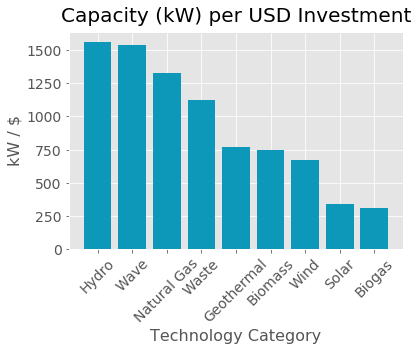

In [24]:
fig, ax = plt.subplots()
ax.bar(df_inv_cap_class_agg['tech_category'],df_inv_cap_class_agg['capacity_per_usd'],color=colors[1])
ax.tick_params(axis="x", rotation = 45, labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title("Capacity (kW) per USD Investment",fontsize = 20,pad=10)
ax.set_xlabel("Technology Category",fontsize=16)
ax.set_ylabel("kW / $",fontsize=16)
;

## GEN, INV Capacity over time with projects overlay (top 16)

In [26]:
df_inv_agg = df_private_inv.copy()
d = {'project_name':'project_count', 'cost_usd_millions':'total_investments'}
df_inv_agg = df_inv_agg.groupby(['country','year'],as_index=False).agg({'project_name':'count','cost_usd_millions':'sum'}).rename(columns=d)


In [27]:
#adjust to match other dataset
df_inv_agg.replace('Lao PDR','Laos',inplace=True) 
df_inv_agg.replace('South Africa','SouthAfrica',inplace=True)

In [28]:
df_gen_cap_inv = pd.merge(df_gen_cap, df_inv_agg,  how='left', left_on=['country','year'], right_on = ['country','year'])

In [29]:
df_gen_cap_inv[df_gen_cap_inv['country']=='Brazil']

,country,year,generated_kwh,capacity_kw,capacity_kwh_100,capacity_kwh_75,ratio_100,ratio_75,generation_change_percent,capacity_change_percent,ratio_change_percent,project_count,total_investments
712,Brazil,1980,130.35880,27.50000,240.900000,180.675000,0.541132,0.721510,NaN,NaN,NaN,NaN,NaN
713,Brazil,1981,131.43370,31.02100,271.743960,203.807970,0.483667,0.644890,0.008246,0.128036,-0.106194,NaN,NaN
714,Brazil,1982,142.00990,33.00200,289.097520,216.823140,0.491218,0.654957,0.080468,0.063860,0.015611,NaN,NaN
715,Brazil,1983,153.06100,34.02800,298.085280,223.563960,0.513481,0.684641,0.077819,0.031089,0.045321,NaN,NaN
716,Brazil,1984,167.96590,34.92300,305.925480,229.444110,0.549042,0.732056,0.097379,0.026302,0.069255,NaN,NaN
717,Brazil,1985,179.63630,37.07700,324.794520,243.595890,0.553077,0.737436,0.069481,0.061679,0.007349,NaN,NaN
718,Brazil,1986,183.90050,37.78600,331.005360,248.254020,0.555582,0.740776,0.023738,0.019122,0.004529,NaN,NaN
719,Brazil,1987,187.37780,40.32900,353.282040,264.961530,0.530392,0.707189,0.018909,0.067300,-0.045340,NaN,NaN
720,Brazil,1988,200.52860,42.22800,369.917280,277.437960,0.542090,0.722787,0.070183,0.047088,0.022057,NaN,NaN
721,Brazil,1989,205.96510,44.79600,392.412960,294.309720,0.524868,0.699824,0.027111,0.060813,-0.031770,NaN,NaN


In [30]:
df_capacity_plt = df_gen_cap_inv.copy()

In [33]:
def plot_capacity(ax, country_name):
    x = np.linspace(1980,2016,7)
    xvals = df_capacity_plt[df_capacity_plt['country']== country_name]['year']
    yvals = df_capacity_plt[df_capacity_plt['country']== country_name]['capacity_kw']
    yvals2 = df_capacity_plt[df_capacity_plt['country']== country_name]['project_count']
    ax.scatter(xvals,yvals,color='black',s=yvals2*2,zorder=2)
    ax.plot(xvals,yvals,color=colors[2],alpha=0.5,zorder=1)
    ax.set_xticks(x)
    ax.tick_params(axis="both", labelsize=10)
    ax.set_xlabel("Years",fontsize=14)
    ax.set_ylabel("Capacity (kw)",fontsize=14)
    ax.set_title("{}".format(country_name),fontsize=18);

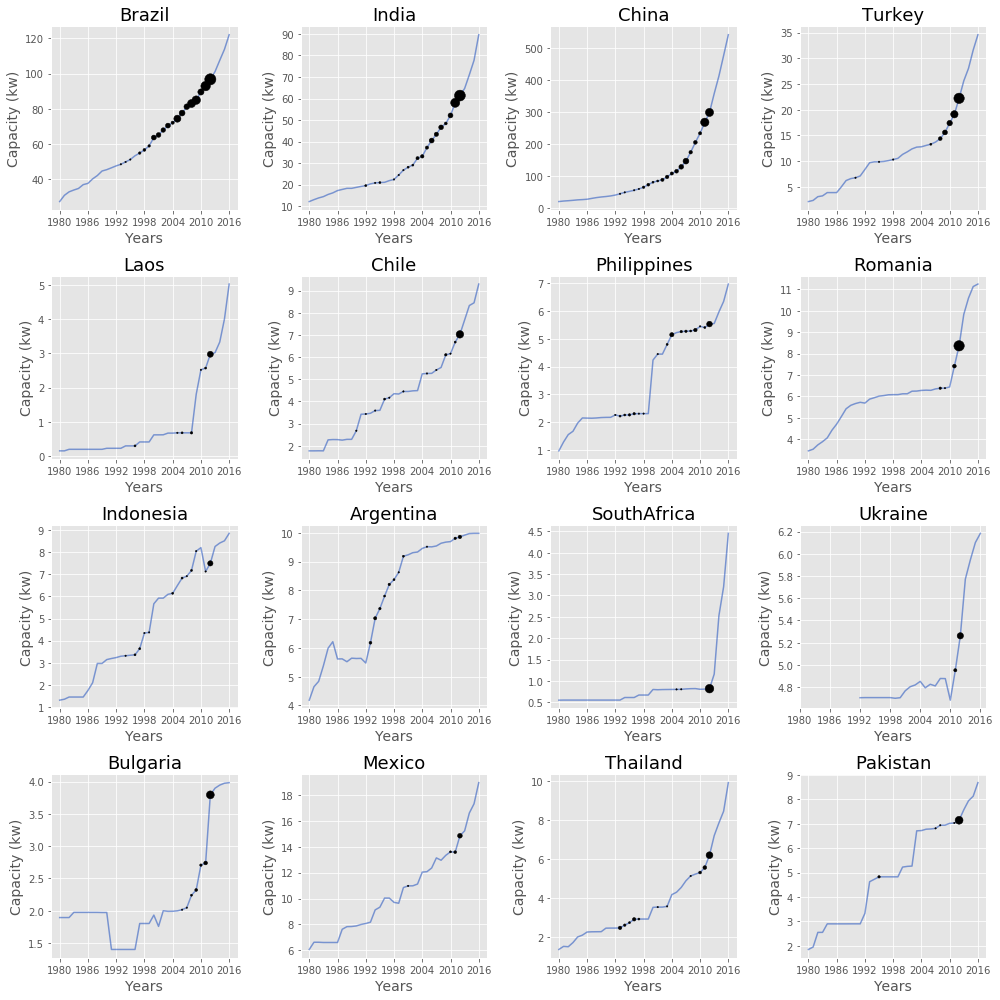

In [34]:
fig, axs = plt.subplots(4, 4, figsize=(14, 14))

for ax, country in zip(axs.flatten(),top16):
    plot_capacity(ax, country)
plt.tight_layout()

## GEN, INV ratio with projects overlay (top 16)

In [40]:
df_ratio_plt = df_gen_cap_inv.copy()

In [41]:
def plot_ratio(ax, country_name):
    x = np.linspace(1980,2016,7)
    xvals = df_ratio_plt[df_ratio_plt['country']== country_name]['year']
    yvals = df_ratio_plt[df_ratio_plt['country']== country_name]['ratio_75']
    yvals2 = df_ratio_plt[df_ratio_plt['country']== country_name]['project_count']
    ax.scatter(xvals,yvals,color='black',s=yvals2*2,zorder=2)
    ax.plot(xvals,yvals,color=colors[0],zorder=1)
    ax.set_xticks(x)
    ax.tick_params(axis="both", labelsize=10)
    ax.set_xlabel("Years",fontsize=14)
    ax.set_ylabel("Generation/Capacity Ratio",fontsize=14)
    ax.set_title("{}".format(country_name),fontsize=18);

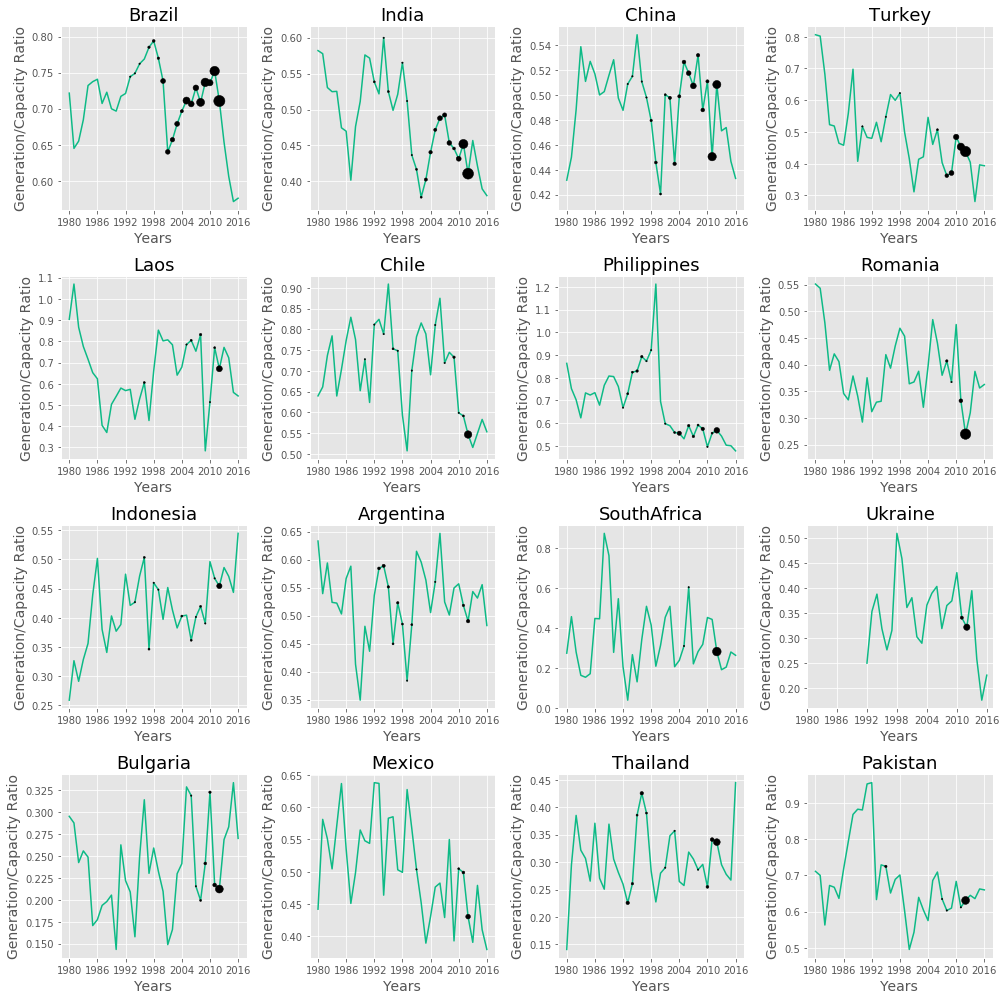

In [42]:
fig, axs = plt.subplots(4, 4, figsize=(14, 14))

for ax, country in zip(axs.flatten(),top16):
    plot_ratio(ax, country)
plt.tight_layout()

## GEN, INV Percent capacity change (top 16 as line series)

In [45]:
def plot_capacity_change(ax, country_name):
    x = np.linspace(1980,2016,7)
    #y = np.linspace(-0.3,1.3,10)
    xvals = df_capacity_plt[df_capacity_plt['country']== country_name]['year']
    yvals = df_capacity_plt[df_capacity_plt['country']== country_name]['capacity_change_percent']
    yvals2 = df_capacity_plt[df_capacity_plt['country']== country_name]['project_count']
    ax.scatter(xvals,yvals,color='black',s=yvals2*2,zorder=2)
    ax.plot(xvals,yvals,color=colors[1],zorder=1)
    ax.set_xticks(x)
    ax.tick_params(axis="both", labelsize=10)
    ax.set_xlabel("Years",fontsize=14)
    ax.set_ylabel("Capacity % Change",fontsize=14)
    ax.set_title("{}".format(country_name),fontsize=18);

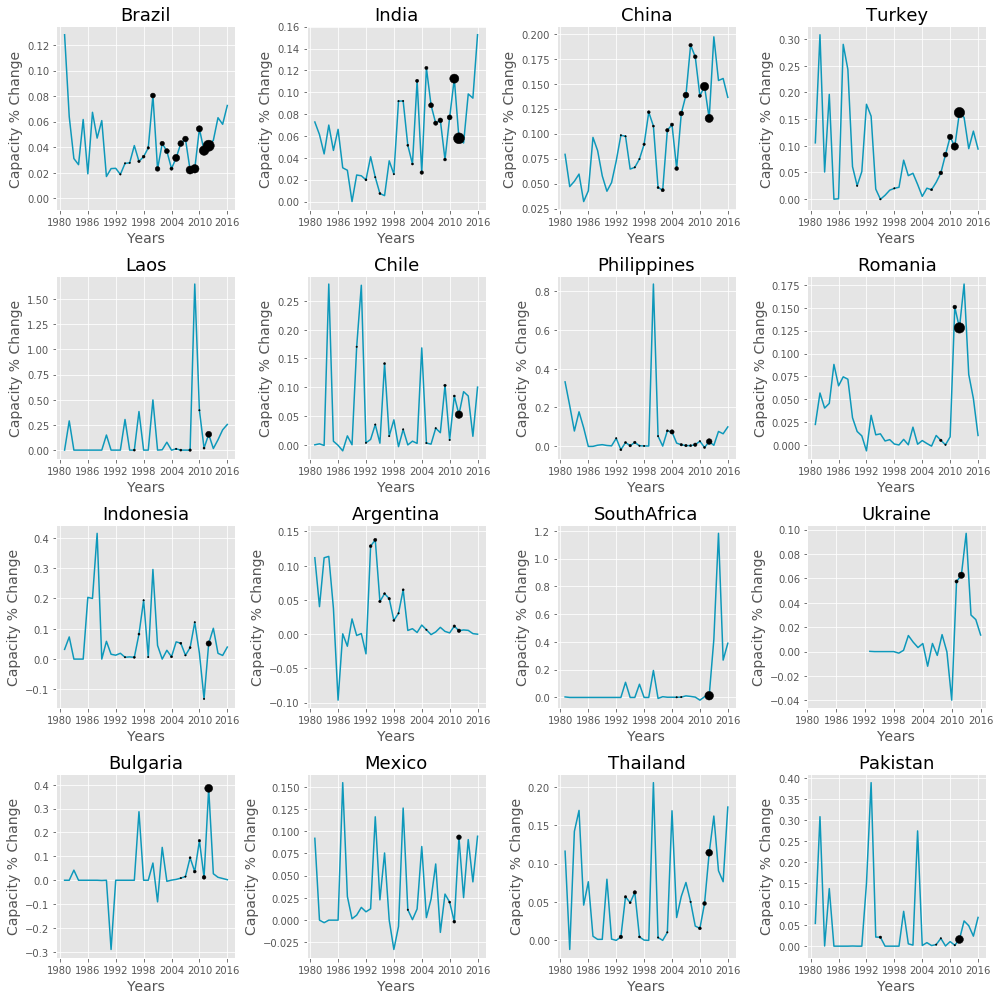

In [46]:
fig, axs = plt.subplots(4, 4, figsize=(14, 14))

for ax, country in zip(axs.flatten(),top16):
    plot_capacity_change(ax, country)
plt.tight_layout()

## Plot % Change Overlay of 16 Countries

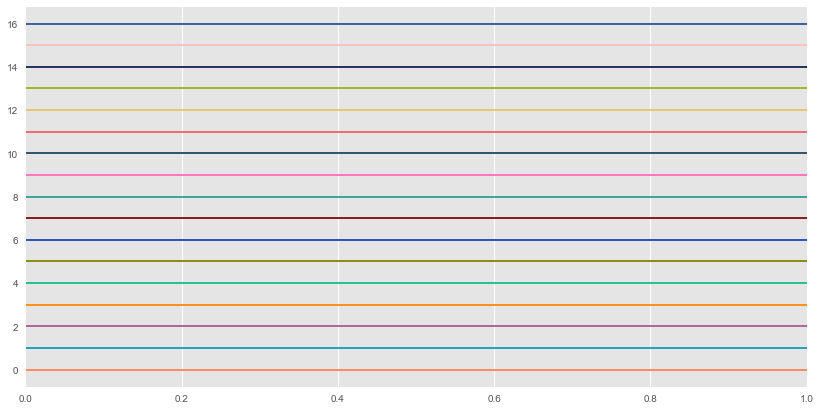

In [645]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
for idx, color in enumerate(colors2):
    ax.axhline(idx,color=color)
plt.show()

In [47]:
def plot_capacity_change_single(country_name,color_idx):
    x = np.linspace(1980,2016,7)
    y = np.linspace(-0.5,1.5,9)
    xvals = df_capacity_plt[df_capacity_plt['country']== country_name]['year']
    yvals = df_capacity_plt[df_capacity_plt['country']== country_name]['capacity_change_percent']
    ax.plot(xvals,yvals,label=country_name,linewidth=1,color=colors2[color_idx])
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.tick_params(axis="both", labelsize=14)
    ax.set_xlabel("Years",fontsize=14,labelpad=10)
    ax.set_ylabel("Capacity % Change YOY",fontsize=14)
    ax.set_title("Capacity % Change YOY",fontsize=18);

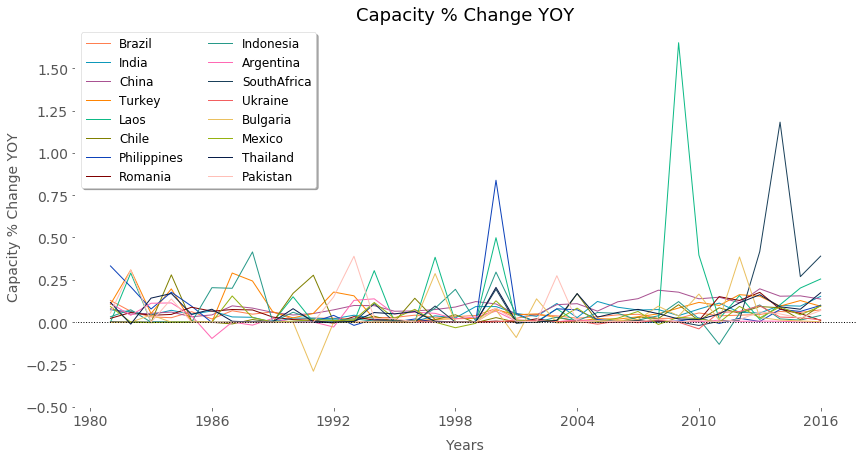

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
for idx, country in enumerate(top16):
    plot_capacity_change_single(country,idx)
ax.legend(loc='upper left', ncol=2, fancybox=True, shadow=True,fontsize=12,frameon=1,facecolor='white')
ax.set_facecolor('none')
ax.axhline(0, color='black',linewidth=1,linestyle=':')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')  
plt.show()

## GEN Correlation between generation and capacity

In [49]:
df_private_inv.corr()

,cost_usd_millions,year,capacity_mw,capacity_kw
cost_usd_millions,1.000000,0.032496,0.595798,0.595798
year,0.032496,1.000000,-0.051941,-0.051941
capacity_mw,0.595798,-0.051941,1.000000,1.000000
capacity_kw,0.595798,-0.051941,1.000000,1.000000


In [50]:
df_gen_cap.corr()

,year,generated_kwh,capacity_kw,capacity_kwh_100,capacity_kwh_75,ratio_100,ratio_75,generation_change_percent,capacity_change_percent,ratio_change_percent
year,1.000000,0.052299,0.071362,0.071362,0.071362,-0.044251,-0.044251,0.037100,0.013493,0.015789
generated_kwh,0.052299,1.000000,0.989766,0.989766,0.989766,-0.011968,-0.011968,-0.018384,-0.009421,-0.010889
capacity_kw,0.071362,0.989766,1.000000,1.000000,1.000000,-0.014437,-0.014437,-0.017556,-0.008585,-0.011007
capacity_kwh_100,0.071362,0.989766,1.000000,1.000000,1.000000,-0.014437,-0.014437,-0.017556,-0.008585,-0.011007
capacity_kwh_75,0.071362,0.989766,1.000000,1.000000,1.000000,-0.014437,-0.014437,-0.017556,-0.008585,-0.011007
ratio_100,-0.044251,-0.011968,-0.014437,-0.014437,-0.014437,1.000000,1.000000,0.095379,-0.006525,0.073574
ratio_75,-0.044251,-0.011968,-0.014437,-0.014437,-0.014437,1.000000,1.000000,0.095379,-0.006525,0.073574
generation_change_percent,0.037100,-0.018384,-0.017556,-0.017556,-0.017556,0.095379,0.095379,1.000000,0.096399,0.595499
capacity_change_percent,0.013493,-0.009421,-0.008585,-0.008585,-0.008585,-0.006525,-0.006525,0.096399,1.000000,-0.016258
ratio_change_percent,0.015789,-0.010889,-0.011007,-0.011007,-0.011007,0.073574,0.073574,0.595499,-0.016258,1.000000


## GEN, INV Correlation between % capacity change & investment amount

## Correlation between % changes in gen/cap and investment summary (count, amount, type)

In [51]:
df_private_inv.head()

,region,country,income_group,project_name,technology,cost_usd_millions,year,capacity_mw,capacity_kw
0,East Asia and Pacific,Cambodia,Low income,Kirirom 1 and 3 Hydropower Stations,"Hydro, Small (<50MW)",20.00,2001,12.0,12000.0
1,East Asia and Pacific,Cambodia,Low income,Stung Atay River Hydropower Station,"Hydro, Large (>50MW)",255.30,2007,120.0,120000.0
2,East Asia and Pacific,Cambodia,Low income,ABC Phnom Penh Biomass Plant,Biomass,6.33,2007,2.0,2000.0
3,East Asia and Pacific,Cambodia,Low income,Kamchay Hydropower Station,"Hydro, Large (>50MW)",280.00,2007,193.0,193000.0
4,East Asia and Pacific,Cambodia,Low income,Kirirom 1 and 3 Hydropower Stations,"Hydro, Small (<50MW)",47.10,2008,30.0,30000.0


In [52]:
df_gen_cap.head()

,country,year,generated_kwh,capacity_kw,capacity_kwh_100,capacity_kwh_75,ratio_100,ratio_75,generation_change_percent,capacity_change_percent,ratio_change_percent
0,Afghanistan,1980,0.711,0.262,2.29512,1.72134,0.309788,0.413050,NaN,NaN,NaN
1,Afghanistan,1981,0.721,0.259,2.26884,1.70163,0.317784,0.423711,0.014065,-0.011450,0.025811
2,Afghanistan,1982,0.707,0.259,2.26884,1.70163,0.311613,0.415484,-0.019417,0.000000,-0.019417
3,Afghanistan,1983,0.746,0.272,2.38272,1.78704,0.313088,0.417450,0.055163,0.050193,0.004732
4,Afghanistan,1984,0.757,0.272,2.38272,1.78704,0.317704,0.423606,0.014745,0.000000,0.014745


In [53]:
df_gen_cap_inv.corr()

,year,generated_kwh,capacity_kw,capacity_kwh_100,capacity_kwh_75,ratio_100,ratio_75,generation_change_percent,capacity_change_percent,ratio_change_percent,project_count,total_investments
year,1.000000,0.052299,0.071362,0.071362,0.071362,-0.044251,-0.044251,0.037100,0.013493,0.015789,0.309128,0.188343
generated_kwh,0.052299,1.000000,0.989766,0.989766,0.989766,-0.011968,-0.011968,-0.018384,-0.009421,-0.010889,0.433095,0.320995
capacity_kw,0.071362,0.989766,1.000000,1.000000,1.000000,-0.014437,-0.014437,-0.017556,-0.008585,-0.011007,0.410145,0.255102
capacity_kwh_100,0.071362,0.989766,1.000000,1.000000,1.000000,-0.014437,-0.014437,-0.017556,-0.008585,-0.011007,0.410145,0.255102
capacity_kwh_75,0.071362,0.989766,1.000000,1.000000,1.000000,-0.014437,-0.014437,-0.017556,-0.008585,-0.011007,0.410145,0.255102
ratio_100,-0.044251,-0.011968,-0.014437,-0.014437,-0.014437,1.000000,1.000000,0.095379,-0.006525,0.073574,-0.097713,0.049000
ratio_75,-0.044251,-0.011968,-0.014437,-0.014437,-0.014437,1.000000,1.000000,0.095379,-0.006525,0.073574,-0.097713,0.049000
generation_change_percent,0.037100,-0.018384,-0.017556,-0.017556,-0.017556,0.095379,0.095379,1.000000,0.096399,0.595499,-0.028957,-0.036282
capacity_change_percent,0.013493,-0.009421,-0.008585,-0.008585,-0.008585,-0.006525,-0.006525,0.096399,1.000000,-0.016258,0.182899,0.022997
ratio_change_percent,0.015789,-0.010889,-0.011007,-0.011007,-0.011007,0.073574,0.073574,0.595499,-0.016258,1.000000,-0.072780,-0.044820


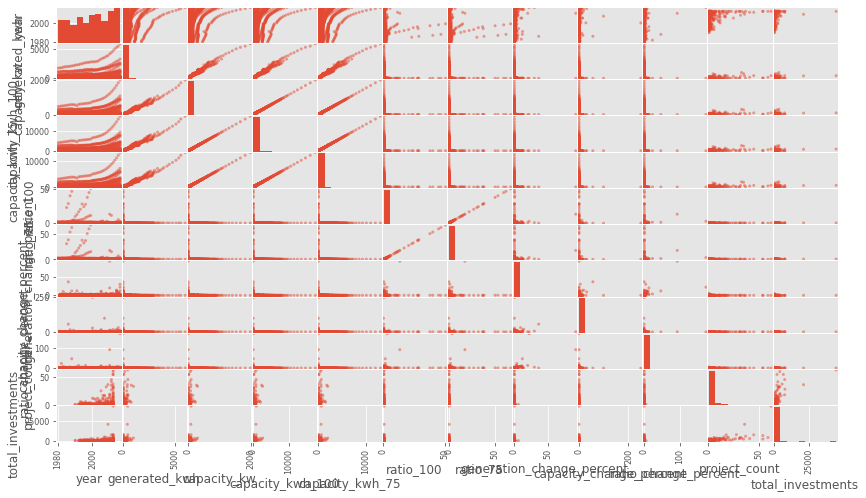

In [54]:
from matplotlib.artist import setp
pd.plotting.scatter_matrix(df_gen_cap_inv,figsize=(14,8),diagonal='hist')
plt.show()